<a href="https://colab.research.google.com/github/Anderson1292/data_science/blob/main/notebooks/Statistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
base = pd.read_csv('iris.csv')
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
np.random.seed(2345)
sample = np.random.choice(a=[0,1],size=150,replace=True,p=[0.7,0.3])

print('Sample size: {}'.format(len(sample)))
print('First sample size: {}'.format(len(sample[sample==1]))) #1
print('Second sample size: {}'.format(len(sample[sample==0]))) #0

Sample size: 150
First sample size: 49
Second sample size: 101


In [5]:
sample

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [6]:
new_sample = base.loc[sample==0]
new_sample.shape

(101, 5)

#Systematic sample

In [8]:
#Amostra sistemática
from math import ceil

population = 150
sample = 15
k = ceil(population/sample)

seed = np.random.randint(low=1,high=k+1,size=1)
print(seed)

[2]


In [9]:
accumulator = seed[0]
raffled = []

for i in range(sample):
  raffled.append(accumulator)
  accumulator += k

print(raffled)

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]


In [10]:
base_final = base.loc[raffled]
base_final

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [12]:
base['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [14]:
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Stratified statistics

In [16]:
#Estatistica estratificada

# base.iloc[:,0:4] -> only search for the previous attributes, that is, the data on
# the petal and setal of the plants

# base.iloc[:,4] -> only look for the class, wich is the plant species(setosa,
# virginica or versiclor)
from sklearn.model_selection import train_test_split

X,_,y,_ = train_test_split(base.iloc[:,0:4], base.iloc[:,4],
                           test_size=0.5,stratify=base.iloc[:,4])
y.value_counts()

Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: class, dtype: int64

In [17]:
infert = pd.read_csv('infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [18]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [23]:
X, _,y, _ = train_test_split(infert.iloc[:,2:9],infert.iloc[:,1],
                             test_size=0.6,stratify=infert.iloc[:,1])
y.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

#Measures of centrality and variability

In [24]:
from scipy import stats

players = [40000,18000,12000,250000,30000,140000,300000,40000,800000]
np.mean(players)

181111.11111111112

In [25]:
np.median(players)

40000.0

In [26]:
#generation of quartiles
quartis = np.quantile(players,[0,0.25,0.5,0.75,1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [27]:
#Standard deviation
np.std(players,ddof=1)

255307.87514511007

In [28]:
stats.describe(players)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

#Normal distribution

In [29]:
#Example: mean=8 and std = 2
#probability that x is less than 6

from scipy.stats import norm

norm.cdf(6,8,2) # "Less than" uses that "CDF" method

0.15865525393145707

In [31]:
#probability that x is greater than less 6

#norm.sf(6,8,2) "Bigger than" uses that "SF" method
1 - norm.cdf(6,8,2)

0.8413447460685429

In [33]:
#probability that x is less than 6 or greater than 10
norm.cdf(6,8,2) + norm.sf(10,8,2)

0.31731050786291415

In [34]:
#probability x is less than 10 and greater than 8
norm.cdf(10,8,2) - norm.sf(8,8,2)

0.3413447460685429

#Normality tests

In [40]:
from scipy import stats
from scipy.stats import norm,skewnorm
import matplotlib.pyplot as plt

data = norm.rvs(size=1000)
data

array([-1.55448628e+00, -7.47923607e-01, -1.07260430e+00, -2.94166022e-01,
       -7.80035059e-01,  3.61742672e-02, -1.01594584e-01, -8.79066053e-01,
       -1.30118167e+00, -1.33553777e+00, -1.03231152e-01,  4.59944820e-01,
       -9.73203911e-01, -9.87692832e-01,  1.32441744e+00,  5.19162348e-01,
       -1.11150632e+00, -1.39013289e+00, -4.05593581e-01,  7.78443376e-01,
       -1.77733690e+00, -4.25904309e-01, -9.57130193e-01,  1.16396319e-01,
        5.33338113e-01, -6.36166673e-01, -5.56091487e-02, -1.19187597e+00,
        2.47065142e-01,  2.70574062e-01,  3.79527621e-01,  6.81373137e-01,
        3.28586318e-01, -7.76134604e-02,  3.14406985e-01, -1.15891609e+00,
        3.69048337e-01,  2.14745878e-01, -1.24473874e+00,  3.72121391e-01,
        1.52435330e-01,  1.70067904e+00,  2.55632238e+00, -2.85333003e-02,
        2.96262790e-01,  5.61403081e-01, -1.33034272e+00,  1.62398256e+00,
       -1.95573250e-01,  1.69535570e+00,  3.24898694e-02, -4.66299467e-01,
        7.11033017e-01, -

Text(0.5, 1.0, 'Data table')

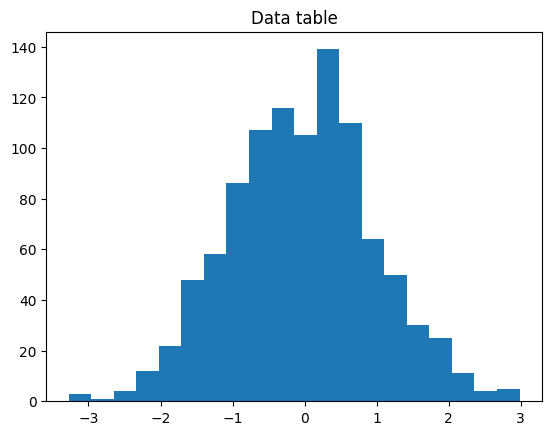

In [41]:
plt.hist(data,bins=20)
plt.title('Data table')

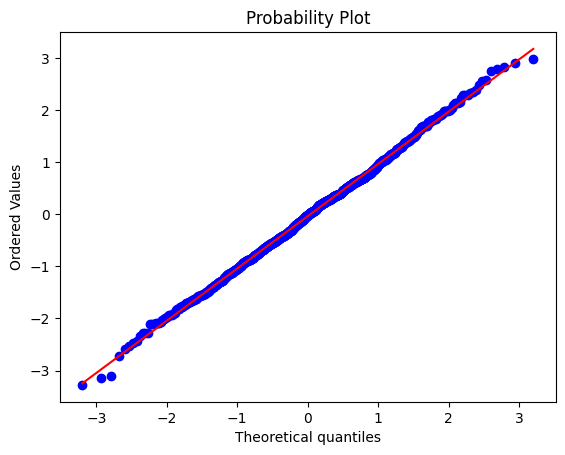

In [42]:
fig,ax = plt.subplots()
stats.probplot(data,fit=True,plot=ax)
plt.show()

### Shapiro test

In [39]:
stats.shapiro(data)

ShapiroResult(statistic=0.9823552966117859, pvalue=0.20195189118385315)

## Non-normalized data

Text(0.5, 1.0, 'Data table')

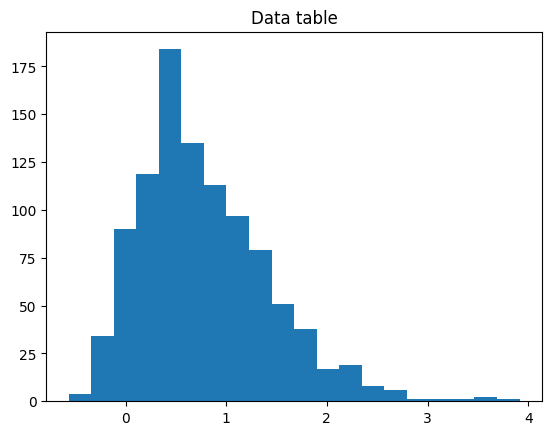

In [43]:
data2 = skewnorm.rvs(4,size=1000)

plt.hist(data2,bins=20)
plt.title('Data table')

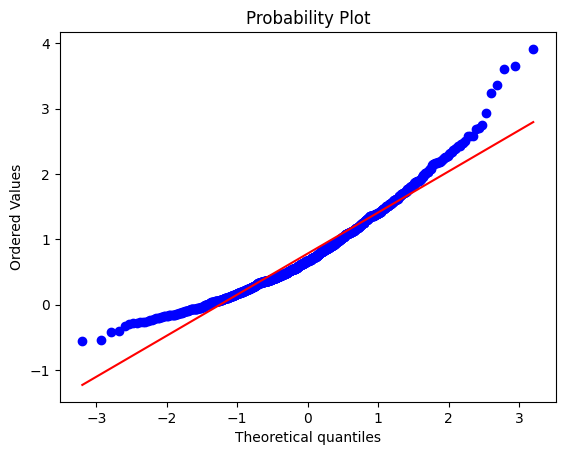

In [44]:
fig, ax = plt.subplots()
stats.probplot(data2,fit=True,plot=ax)
plt.show()

In [45]:
stats.shapiro(data2)

ShapiroResult(statistic=0.9524130821228027, pvalue=1.8219677041078775e-17)